In [16]:
import pandas as pd
import numpy as np

import sklearn

# import warnings
# warnings.filterwarnings("ignore")

In [17]:
from sklearn.datasets import load_boston

boston = load_boston()

for line in boston.DESCR.split("\n")[5:28]:
    print(line)

boston_df = pd.DataFrame(data=boston.data, columns = boston.feature_names)
boston_df["Price"] = boston.target

boston_df.head()

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the

Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`~sklearn.datasets.fetch_california_housing`) and the Ames housing
    datas

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X, Y = boston.data, boston.target

print("Total Data Size : ", X.shape, Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.85, test_size=0.15, random_state=123, shuffle=True)

print("Train/Test Sizes : ",X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

print()
print("Test  R^2 Score : ", lin_reg.score(X_test, Y_test))
print("Train R^2 Score : ", lin_reg.score(X_train, Y_train))

Total Data Size :  (506, 13) (506,)
Train/Test Sizes :  (430, 13) (76, 13) (430,) (76,)

Test  R^2 Score :  0.667576090488816
Train R^2 Score :  0.7524778368022296


In [19]:
import shap

shap.initjs()

In [21]:
print(X_train.shape)
print(Y_train.shape)

(430, 13)
(430,)


In [22]:
lin_reg

LinearRegression()

In [7]:
lin_reg_explainer1 = shap.LinearExplainer(lin_reg, X_train)

In [23]:
sample_idx = 0

shap_vals = lin_reg_explainer1.shap_values(X_test[sample_idx])

print("Base Value : ", lin_reg_explainer1.expected_value)
print()
print("Shap Values for Sample %d : "%sample_idx, shap_vals)
print("\n")
print("Prediction From Model                            : ", lin_reg.predict(X_test[sample_idx].reshape(1,-1))[0])
print("Prediction From Adding SHAP Values to Base Value : ", lin_reg_explainer1.expected_value + shap_vals.sum())

Base Value :  21.025384194765643

Shap Values for Sample 0 :  [-4.94799946 -0.55072121  0.36812662 -0.0482649  -0.69645417 -1.88755327
 -0.06792962  3.42385064  4.1690345  -3.23632615 -1.35342482 -2.78930191
  1.94715348]


Prediction From Model                            :  15.35557393538669
Prediction From Adding SHAP Values to Base Value :  15.355573935386678


In [24]:
lin_reg_explainer2 = shap.LinearExplainer(lin_reg, X_train, feature_perturbation="correlation_dependent")

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


Estimating transforms:   0%|          | 0/1000 [00:00<?, ?it/s]

In [25]:
x = 0

shap_vals = lin_reg_explainer2.shap_values(X_test[sample_idx].reshape(1,-1))[0]

print("Base Value : ", lin_reg_explainer2.expected_value)
print()
print("Shap Values for Sample %d : "%sample_idx, shap_vals)
print("\n")
print("Prediction From Model                            : ", lin_reg.predict(X_test[sample_idx].reshape(1,-1))[0])
print("Prediction From Adding SHAP Values to Base Value : ", lin_reg_explainer2.expected_value + shap_vals.sum())

Base Value :  22.35604651162791

Shap Values for Sample 0 :  [-6.67507542 -0.10969988 -0.37693323  0.02725076  1.20944464 -3.56425782
 -0.2801055   0.38673862 -1.07079875 -0.82646353 -0.61136453 -3.97846463
  8.86925668]


Prediction From Model                            :  15.35557393538669
Prediction From Adding SHAP Values to Base Value :  15.355573935386529


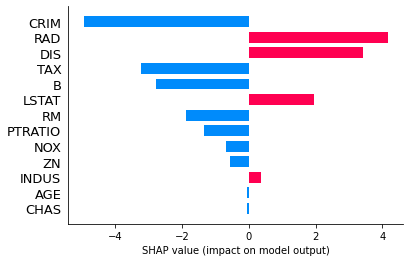

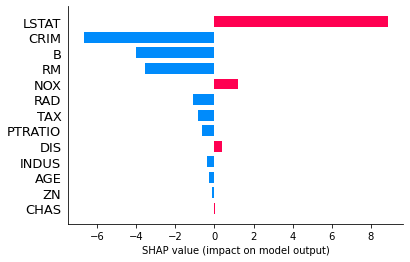

In [26]:
shap.bar_plot(lin_reg_explainer1.shap_values(X_test[0]),
              feature_names=boston.feature_names,
              max_display=len(boston.feature_names))

shap.bar_plot(lin_reg_explainer2.shap_values(X_test[0].reshape(1,-1))[0],
              feature_names=boston.feature_names,
              max_display=len(boston.feature_names))

In [32]:
shap.waterfall_plot(lin_reg_explainer1.expected_value,
                    lin_reg_explainer1.shap_values(X_test[0]),
                    feature_names=boston.feature_names,
                    max_display=len(boston.feature_names),
                    )

TypeError: waterfall() got an unexpected keyword argument 'feature_names'

In [33]:
shap.waterfall_plot(lin_reg_explainer2.expected_value,
                    lin_reg_explainer2.shap_values(X_test[0].reshape(1,-1))[0],
                    feature_names=boston.feature_names,
                    max_display=len(boston.feature_names))

TypeError: waterfall() got an unexpected keyword argument 'feature_names'

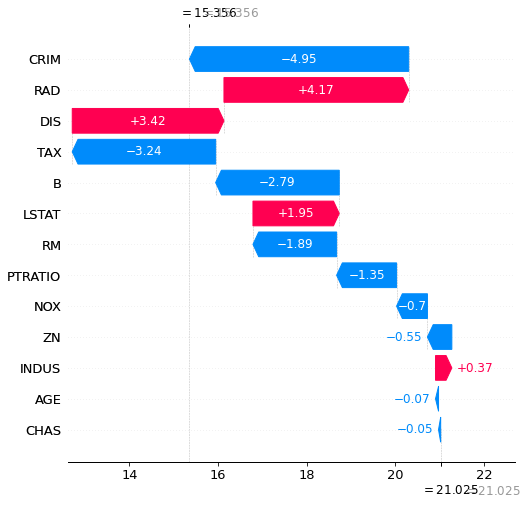

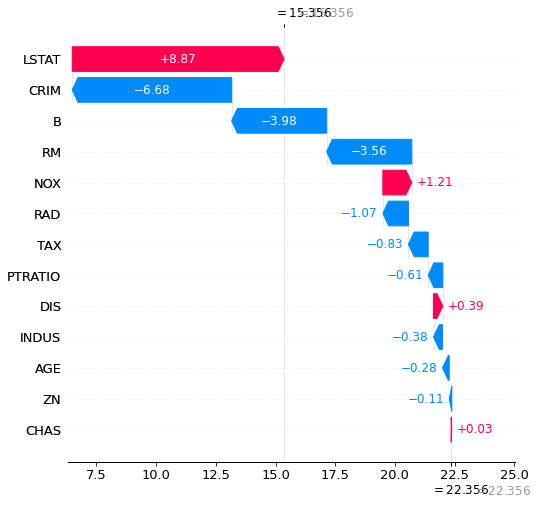

In [34]:
shap.plots._waterfall.waterfall_legacy(lin_reg_explainer1.expected_value,
                    lin_reg_explainer1.shap_values(X_test[0]),
                    feature_names=boston.feature_names,
                    max_display=len(boston.feature_names),
                    )

shap.plots._waterfall.waterfall_legacy(lin_reg_explainer2.expected_value,
                    lin_reg_explainer2.shap_values(X_test[0].reshape(1,-1))[0],
                    feature_names=boston.feature_names,
                    max_display=len(boston.feature_names))

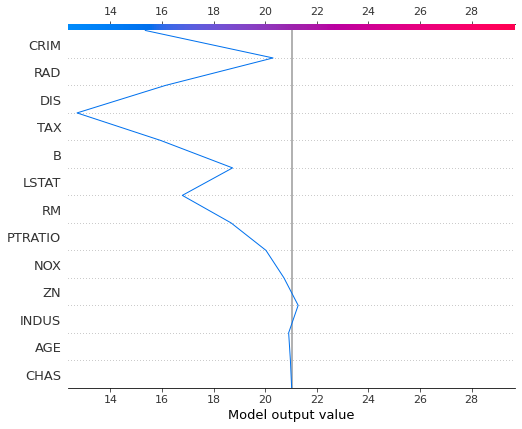

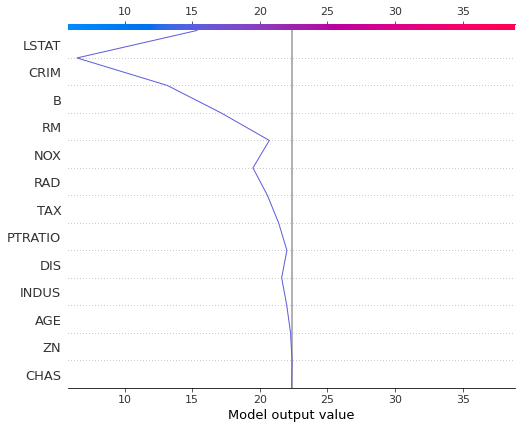

In [36]:
shap.decision_plot(lin_reg_explainer1.expected_value,
                   lin_reg_explainer1.shap_values(X_test[0]),
                   feature_names=boston.feature_names.tolist(),
                   )

shap.decision_plot(lin_reg_explainer2.expected_value,
                   lin_reg_explainer2.shap_values(X_test[0].reshape(1,-1))[0],
                   feature_names=boston.feature_names.tolist(),
                   )

In [38]:
shap.force_plot(lin_reg_explainer1.expected_value,
                lin_reg_explainer1.shap_values(X_test[0]),
                feature_names=boston.feature_names,
                out_names="Price($)")

In [39]:
shap.force_plot(lin_reg_explainer2.expected_value,
                lin_reg_explainer2.shap_values(X_test[0].reshape(1,-1))[0],
                feature_names=boston.feature_names,
                out_names="Price($)")

In [40]:
shap.force_plot(lin_reg_explainer1.expected_value,
                lin_reg_explainer1.shap_values(X_test[0:10]),
                feature_names=boston.feature_names,
                out_names="Price($)", figsize=(25,3),
                link="identity")

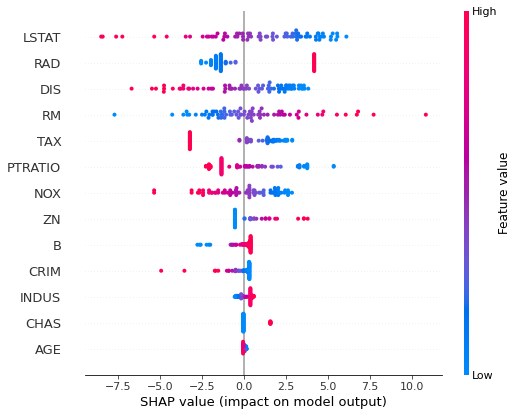

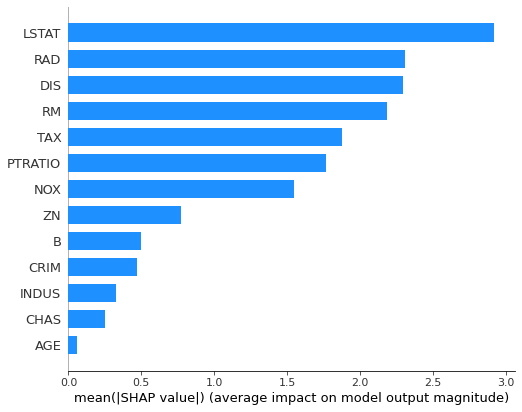

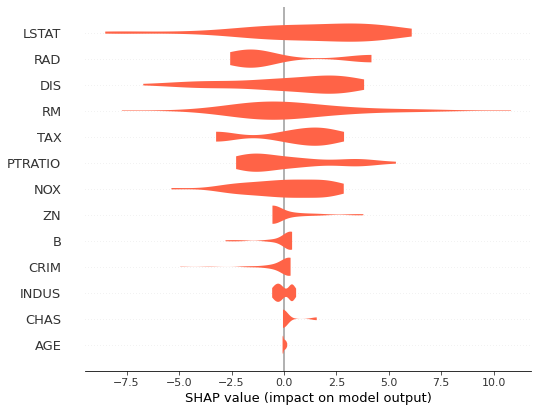

In [43]:
shap.summary_plot(lin_reg_explainer1.shap_values(X_test),
                  features = X_test,
                  feature_names=boston.feature_names)

shap.summary_plot(lin_reg_explainer1.shap_values(X_test),
                  feature_names=boston.feature_names,
                  plot_type="bar",
                  color="dodgerblue"
                  )

shap.summary_plot(lin_reg_explainer1.shap_values(X_test),
                  feature_names=boston.feature_names,
                  plot_type="violin",
                  color="tomato")

In [13]:
from sklearn.datasets import load_wine

wine = load_wine()

for line in wine.DESCR.split("\n")[5:28]:
    print(line)

boston_df = pd.DataFrame(data=wine.data, columns = wine.feature_names)
boston_df["WineType"] = wine.target

boston_df.head()

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,WineType
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [44]:
# from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X, Y = wine.data, wine.target

print("Total Data Size : ", X.shape, Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.85, test_size=0.15, stratify=Y, random_state=123, shuffle=True)

print("Train/Test Sizes : ",X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

# log_reg = LogisticRegression()
log_reg = LogisticRegression(max_iter = 100_000)
log_reg.fit(X_train, Y_train)

print()
print("Test  Accuracy : ", log_reg.score(X_test, Y_test))
print("Train Accuracy : ", log_reg.score(X_train, Y_train))

# lbfgs failed to converge (status=1):
# STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

# Increase the number of iterations (max_iter) or scale the data as shown in:
#     https://scikit-learn.org/stable/modules/preprocessing.html
# Please also refer to the documentation for alternative solver options:
#     https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

Total Data Size :  (178, 13) (178,)
Train/Test Sizes :  (151, 13) (27, 13) (151,) (27,)

Test  Accuracy :  0.9629629629629629
Train Accuracy :  1.0


In [45]:
log_reg_explainer = shap.LinearExplainer(log_reg, data=X_train) # TypeError: __init__() missing 1 required positional argument: 'masker'

TypeError: __init__() missing 1 required positional argument: 'masker'

In [46]:
sample_idx = 0

shap_vals = log_reg_explainer.shap_values(X_test[sample_idx])

val1 = log_reg_explainer.expected_value[0] + shap_vals[0].sum()
val2 = log_reg_explainer.expected_value[1] + shap_vals[1].sum()
val3 = log_reg_explainer.expected_value[2] + shap_vals[2].sum()

print("Base Value : ", log_reg_explainer.expected_value)
print()
print("Shap Values for Sample %d : "%sample_idx, shap_vals)
print("\n")
print("Prediction From Model                            : ", \
                      wine.target_names[log_reg.predict(X_test[sample_idx].reshape(1, -1))[0]])
print("Prediction From Adding SHAP Values to Base Value : ", wine.target_names[np.argmax([val1, val2, val3])])

NameError: name 'log_reg_explainer' is not defined

In [47]:
shap.bar_plot(log_reg_explainer.shap_values(X_test[0])[0], feature_names=wine.feature_names, max_display=len(wine.feature_names))
shap.bar_plot(log_reg_explainer.shap_values(X_test[0])[1], feature_names=wine.feature_names, max_display=len(wine.feature_names))
shap.bar_plot(log_reg_explainer.shap_values(X_test[0])[2], feature_names=wine.feature_names, max_display=len(wine.feature_names))

NameError: name 'log_reg_explainer' is not defined